# Pregunta 7
¿Qué plataforma presenta mejor relación calidad-costo mensual percibida de su catálogo?

Para establecer un punto de referencia, utilizaremos la suscripción estándar de cada plataforma para evaluar la relación calidad-precio de cada plataforma.

* **Disney:** $10.390 CLP al mes. <br>

* **Hulu:** $10.390 CLP al mes.

* **HBO Max:** $7.190 CLP al mes.

* **Netflix:** $9.990 CLP al mes.

* **Paramount:** $4.299 CLP al mes.

* **Prime Video:** $6.490 CLP al mes.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
disney = pd.read_csv('data/api_disney.csv')
hulu = pd.read_csv('data/api_hulu.csv')
hbomax = pd.read_csv('data/api_max.csv')
netflix = pd.read_csv('data/api_netflix.csv')
paramount = pd.read_csv('data/api_disney.csv')
prime = pd.read_csv('data/api_prime.csv')

Tenemos nuestro DataFrame con los ratings de las películas. Le cambiamos el nombre a una de las columnas para poder fusionar los DataFrames.

In [30]:
imdb_ratings = pd.read_csv('data/title.ratings.tsv', sep='\t')
imdb_ratings.rename(columns={'tconst': 'imdb_id'}, inplace=True)
imdb_ratings.head()

,imdb_id,averageRating,numVotes
0,tt0000001,5.7,2182
1,tt0000002,5.5,302
2,tt0000003,6.4,2256
3,tt0000004,5.2,194
4,tt0000005,6.2,2994


Dejamos sólo las columnas que nos interesan en los DataFrame de cada plataforma.

In [31]:
p_list = [disney, hulu, hbomax, netflix, paramount, prime]

for plataforma in p_list:
    plataforma.drop(columns=['id', 'year', 'tmdb_id'], inplace=True)
p_list[0]

,title,imdb_id
0,Predator: Killer of Killers,tt36463894
1,Thunderbolts*,tt20969586
2,Snow White,tt6208148
3,Doctor Strange in the Multiverse of Madness,tt9419884
4,Avatar: The Way of Water,tt1630029
...,...,...
795,Fly,tt31189863
796,Jade Eyed Leopard,tt32059187
797,Protecting Paradise: The Story of Niue,tt32421420
798,John Williams in Tokyo,tt36131268


Fusionamos los DataFrame a partir de los elementos que compartan el mismo valor en la columna "imdb_id".

In [32]:
for a in range(6):
    p_list[a] = pd.merge(p_list[a], imdb_ratings, on='imdb_id', how='inner')
    
p_list[0]

,title,imdb_id,averageRating,numVotes
0,Predator: Killer of Killers,tt36463894,7.5,47138
1,Thunderbolts*,tt20969586,7.1,230511
2,Snow White,tt6208148,2.1,389806
3,Doctor Strange in the Multiverse of Madness,tt9419884,6.9,529038
4,Avatar: The Way of Water,tt1630029,7.5,548872
...,...,...,...,...
794,Fly,tt31189863,7.2,679
795,Jade Eyed Leopard,tt32059187,6.1,10
796,Protecting Paradise: The Story of Niue,tt32421420,6.9,102
797,John Williams in Tokyo,tt36131268,7.8,63


Sacamos la relación dividiendo el promedio total de las películas por el precio de su respectiva plataforma.

In [33]:
l_precios = [10390, 10390, 7190, 9990, 4299, 6490]
l_calidad_precio = []

for a in range(6):
    calidad_promedio = p_list[a]['averageRating'].mean()
    l_calidad_precio.append(int(calidad_promedio)/l_precios[a])

l_calidad_precio

[0.0005774783445620789,
 0.0005774783445620789,
 0.0008344923504867872,
 0.0006006006006006006,
 0.0013956734124214933,
 0.0007704160246533128]

Graficamos para poder visualizar mejor el resultado.

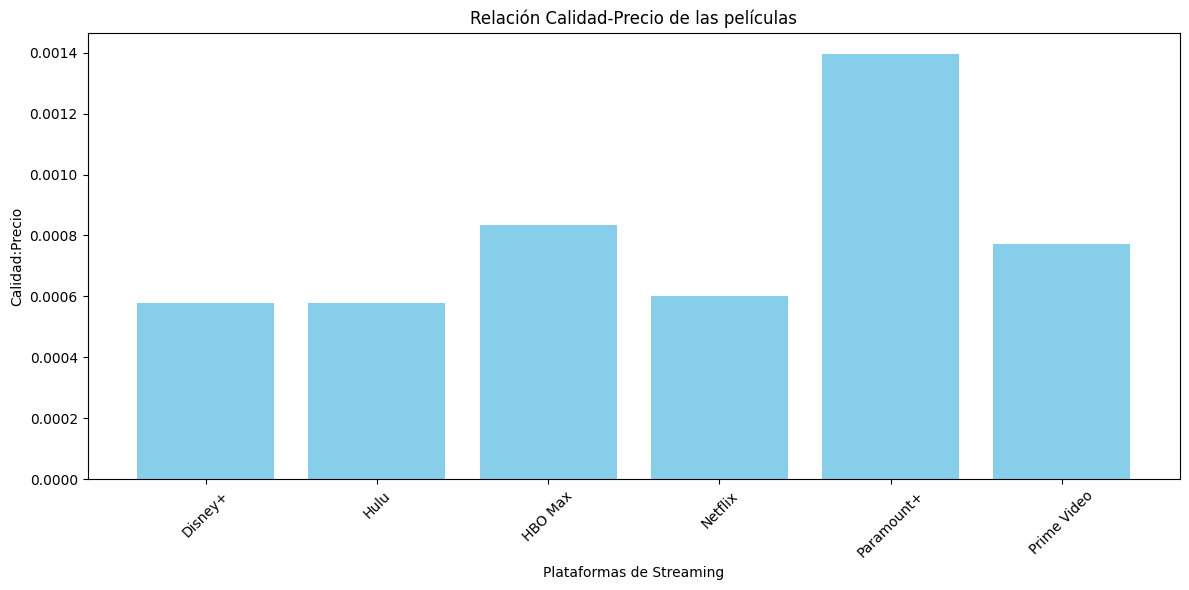

In [34]:
plataformas = ['Disney+', 'Hulu', 'HBO Max', 'Netflix', 'Paramount+', 'Prime Video']

plt.figure(figsize=(12,6))

plt.bar(plataformas, l_calidad_precio, color='skyblue')
plt.xlabel('Plataformas de Streaming')
plt.ylabel('Calidad:Precio')
plt.title('Relación Calidad-Precio de las películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()